# Image Classifier (CIFAR10)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers, models
import matplotlib.pyplot as plt

### Splitting the Data into Training and Testing Set

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)

In [6]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

### Function to plot the Image

In [7]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def plot_sample(X,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

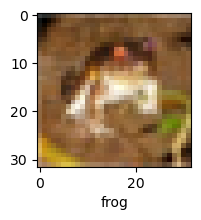

In [8]:
plot_sample(X_train,y_train,0)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

### Building a basic Neural Network

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

In [13]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.3031 - loss: 1.9336
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 60ms/step - accuracy: 0.4214 - loss: 1.6453
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.4517 - loss: 1.5530
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.4765 - loss: 1.4806
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.4920 - loss: 1.4420


### Classification Report for Neural Network

In [15]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.67      0.55      1000
           1       0.57      0.67      0.61      1000
           2       0.30      0.51      0.38      1000
           3       0.38      0.16      0.23      1000
           4       0.50      0.26      0.34      1000
           5       0.30      0.61      0.40      1000
           6       0.59      0.43      0.50      1000
           7       0.66      0.45      0.53      1000
           8       0.78      0.41      0.54      1000
           9       0.61      0.50      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.46     10000
weighted avg       0.52      0.47      0.46     10000



### Building a Convolutional Neural Network

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3882 - loss: 1.6748
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5984 - loss: 1.1408
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6558 - loss: 0.9841
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6902 - loss: 0.8936
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7141 - loss: 0.8241
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7361 - loss: 0.7603
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7569 - loss: 0.7005
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7723 - loss: 0.6521
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7891 - loss: 0.6062
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8002 - loss: 0.5737


In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6948 - loss: 0.9667


[0.9668132066726685, 0.692799985408783]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[5.67712923e-05, 2.42649253e-06, 5.09926490e-03, 9.34047639e-01,
        7.36312591e-04, 5.63663095e-02, 3.31322337e-03, 1.32553705e-05,
        3.61872313e-04, 2.98928535e-06],
       [3.20345499e-02, 6.30432367e-03, 8.25788391e-07, 6.05207788e-06,
        1.42379719e-07, 2.30827780e-07, 6.53299725e-09, 1.01534476e-06,
        9.61513817e-01, 1.39181211e-04],
       [3.42626497e-02, 2.64641363e-02, 4.51142434e-03, 8.46747532e-02,
        1.26187038e-02, 2.24982225e-03, 2.42319796e-03, 3.54774471e-04,
        8.30747068e-01, 1.69348216e-03],
       [8.07068050e-01, 6.14548480e-05, 5.39233210e-03, 1.02777788e-02,
        1.74836977e-03, 2.70477267e-05, 1.50616310e-04, 1.76053029e-04,
        1.75068483e-01, 2.98728792e-05],
       [2.83761005e-06, 9.72236194e-06, 2.20393576e-02, 5.94675876e-02,
        6.26478076e-01, 2.17150412e-02, 2.70213366e-01, 1.50460291e-05,
        5.87060276e-05, 2.89609630e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [21]:
y_test = y_test.reshape(-1,)

### Output

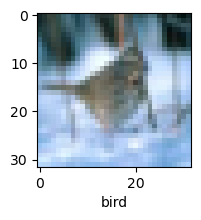

In [22]:
plot_sample(X_test, y_test,6969)

### Classification Report for CNN

In [23]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1000
           1       0.77      0.85      0.81      1000
           2       0.62      0.55      0.58      1000
           3       0.46      0.56      0.51      1000
           4       0.71      0.55      0.62      1000
           5       0.53      0.70      0.60      1000
           6       0.76      0.79      0.77      1000
           7       0.77      0.70      0.74      1000
           8       0.85      0.78      0.81      1000
           9       0.82      0.70      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000

